# Graded Assignment 2
Mark Klik & Misja Mikkers

# Packages

# Assignment 1

First load the `tidyverse` package:

In [3]:
library(tidyverse)
library(ggplot2)

##  Assignment 1a

Read the data file _graded_assignment_2.csv_ from disk:

In [4]:
data1 <- read.csv2( "../Sourcedata/graded_assignment_2.csv")
head(data1)

ID,Group,FKG,DKG,Gender,Elderly,Age
1,5,1,1,male,65-,20-24
2,7,1,0,male,65-,30-34
3,33,0,1,female,65-,60-64
4,34,1,0,female,65+,65-69
5,7,0,1,male,65-,30-34
6,40,1,1,female,65+,95-99


## Assignment 1b

Add column "Health_status" with containing values _1_ (Healthy) and _0_ (Unhealthy).
A person is Healthy, when `FKG` equals 0 and `DKG` equals 0.

So

| FKG | DKG | Health_status   |
|-----|-----|--------------   |
| 0   | 0   | 1               |
| 1   | 0   | 0               |
| 0   | 1   | 0               |
| 1   | 1   | 0               |

Hint: you can use `ifelse()`:

In [5]:
data2 <- data1 %>% 
 mutate(Health_status= ifelse(FKG==0 & DKG ==0,1,0))
  

In [6]:
tail(data2)

,ID,Group,FKG,DKG,Gender,Elderly,Age,Health_status
9995,9995,15,1,1,male,65+,70-74,0
9996,9996,7,1,0,male,65-,30-34,0
9997,9997,30,0,1,female,65-,45-49,0
9998,9998,35,0,0,female,65+,70-74,1
9999,9999,31,1,1,female,65-,50-54,0
10000,10000,8,0,1,male,65-,35-39,0


In the next datacamp course you will learn more about the package `dplyr`. For now we just give you some code. You can run the following script.

First, we want to make "Health_status" a factor instead of a character

In [7]:
data2 <- data2 %>%
  mutate(Health_status = as.numeric(Health_status))
str(data2)

'data.frame':	10000 obs. of  8 variables:
 $ ID           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Group        : int  5 7 33 34 7 40 10 17 37 34 ...
 $ FKG          : int  1 1 0 1 0 1 1 0 0 0 ...
 $ DKG          : int  1 0 1 0 1 1 0 0 0 1 ...
 $ Gender       : Factor w/ 2 levels "female","male": 2 2 1 1 2 1 2 2 1 1 ...
 $ Elderly      : Factor w/ 2 levels "65-","65+": 1 1 1 2 1 2 1 2 2 2 ...
 $ Age          : Factor w/ 20 levels "0-4","10-14",..: 4 6 13 14 6 20 9 17 17 14 ...
 $ Health_status: num  0 0 0 0 0 0 0 1 1 0 ...


Then, we want to count the number of healthy and unhealthy males and females

In [8]:
data3 <- data2 %>%
  group_by(Gender, Health_status) %>%
 summarise(Count_observations = n()) %>%
  mutate(Health_status=as.factor(Health_status))

data3

Gender,Health_status,Count_observations
female,0,3671
female,1,1265
male,0,3765
male,1,1299


## Assignment 2

Recreate with the dataframe "data3" the following barchart ![](../Sourcedata/barchart.png)

* Hint: see for changing the [legends and colors](http://www.cookbook-r.com/Graphs/Legends_(ggplot2)/)
* Hint: the "green" color is in fact the color "greenyellow"
* Hint: see for the [themes](http://ggplot2.tidyverse.org/reference/ggtheme.html): 



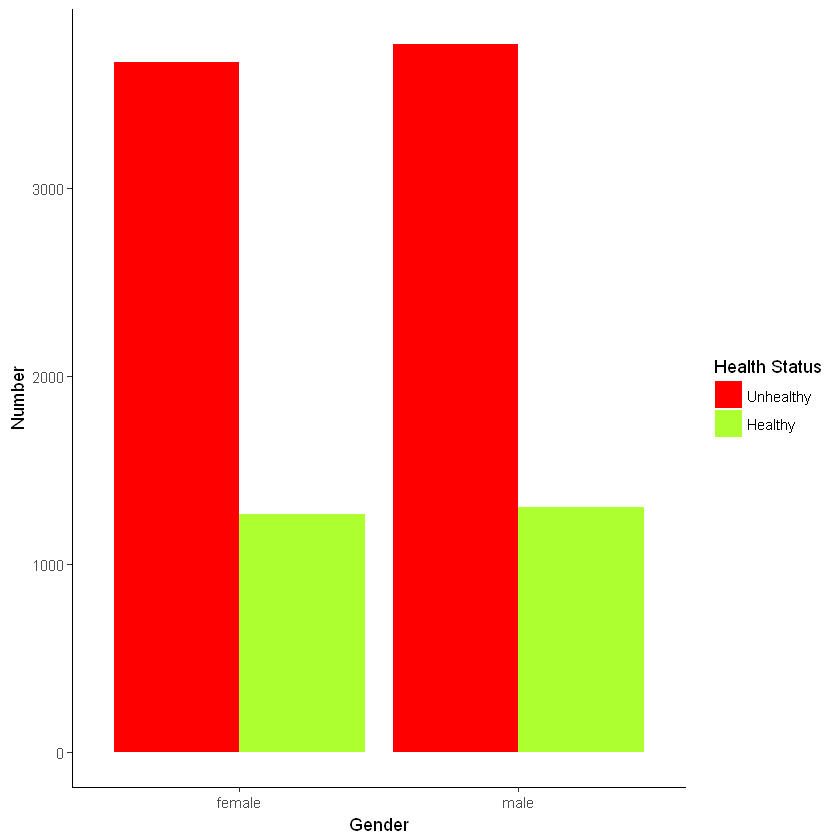

In [43]:
ggplot(data3, aes(x=Gender, y= Count_observations, fill=Health_status))+ 
geom_bar(stat="identity",position="dodge")+ 
theme_classic()+
scale_fill_manual(name="Health Status",label=c("Unhealthy","Healthy"), values=c("1"="greenyellow","0"="red"))+
               ylab("Number")

End notebook